## **Correlation**

**Correlation in Codes**

In [1]:
# importing neccessary llibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setting seed for reproducibility
np.random.seed(234)

In [2]:
# creating a synthetic dataset

students = 40
study_hours = np.random.randint(1, 10, students) # 1 to 9hours study
job_hours = np.random.randint(0, 15, students) # 0 to 14hours job
sleep_hours = np.random.randint(4, 9, students) # 4 to 8 hours sleep
extra_curricular = np.random.randint(0, 6, students) # 0 to 5hrs activities


# Exam score: positively influenced by study & sleep, negatively by job & extra activities
exam_score = (40 
              + 5 * study_hours # strong positive
              + 2 * sleep_hours # mild positive
              - 3 * job_hours   # strong negative
              - 1 * extra_curricular # mild negative
              + np.random.randint(-5, 5, students))


data = pd.DataFrame(
    {
        "study_hours": study_hours,
        "job_hours": job_hours,
        "sleep_hours": sleep_hours,
        "extra_curricular_hours": extra_curricular,
        "exam_score": exam_score
    })

In [3]:
# previewing the first 5 rows
data.head()

,study_hours,job_hours,sleep_hours,extra_curricular_hours,exam_score
0,9,10,4,2,56
1,5,9,5,1,46
2,2,0,6,3,57
3,4,10,6,5,37
4,8,8,7,1,69


In [4]:
# computing the correlation coefficient for each date feature
corr_coefficients = data.corr()
corr_coefficients

,study_hours,job_hours,sleep_hours,extra_curricular_hours,exam_score
study_hours,1.000000,-0.136551,-0.006383,-0.114442,0.694048
job_hours,-0.136551,1.000000,0.188992,0.209991,-0.782525
sleep_hours,-0.006383,0.188992,1.000000,0.158029,-0.035653
extra_curricular_hours,-0.114442,0.209991,0.158029,1.000000,-0.276837
exam_score,0.694048,-0.782525,-0.035653,-0.276837,1.000000


In [5]:
data.columns

Index(['study_hours', 'job_hours', 'sleep_hours', 'extra_curricular_hours',
       'exam_score'],
      dtype='object')

### **Plotting the relationship on a scatter plot**

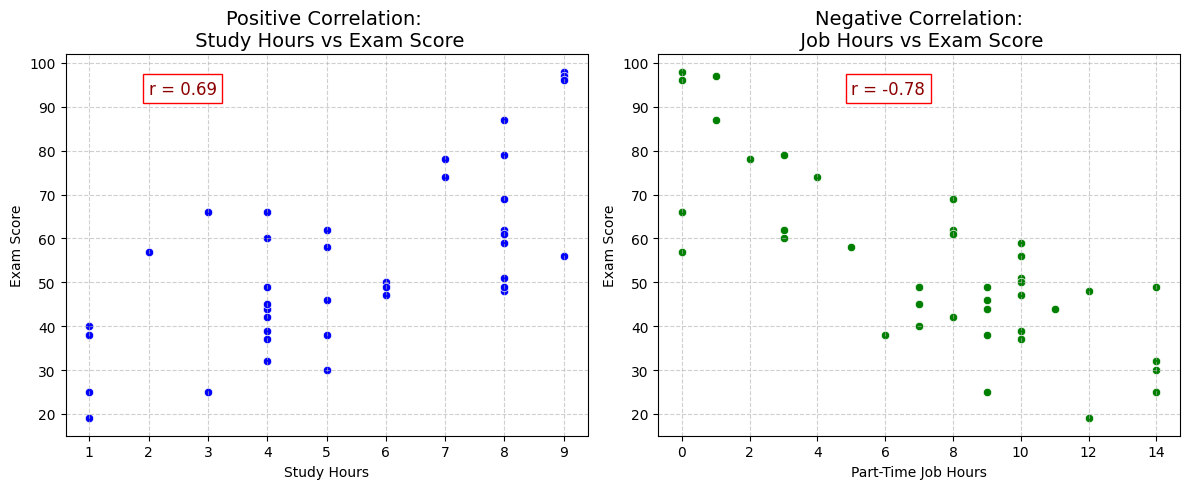

In [6]:
# plotting positive and negative examples
plt.figure(figsize = (12, 5))

# positive correlations: Study VS Score
plt.subplot(1, 2, 1)
sns.scatterplot(x= "study_hours", y= "exam_score", data = data, color ="blue")
plt.title("Positive Correlation: \n Study Hours vs Exam Score", fontsize = 14)
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.text(2, max(data['exam_score'])-5, f"r = {corr_coefficients.loc['study_hours','exam_score']:.2f}",
         fontsize=12, color="darkred", bbox=dict(facecolor='white', edgecolor='red'))
plt.grid(True, linestyle = "--", alpha = 0.6)

# Negative correlation: Job vs Score
plt.subplot(1,2,2)
sns.scatterplot(x="job_hours", y="exam_score", data = data, color = "green")
plt.title("Negative Correlation:\n Job Hours vs Exam Score", fontsize = 14)
plt.xlabel("Part-Time Job Hours")
plt.ylabel("Exam Score")
plt.text(5, max(data['exam_score'])-5, f"r = {corr_coefficients.loc['job_hours','exam_score']:.2f}",
         fontsize=12, color="darkred", bbox=dict(facecolor='white', edgecolor='red'))
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

### **Regression**

Correlation shows whether variables move together while regression explains how much and how significantly they move together.

Regression analysis is a statistical method used to:

1. Quantify the relationship between a dependent variable (the outcome) and one or more independent variables (the predictors).

2. Predict the value of the dependent variable based on the values of the independent variables.

- Mathematically, it is about finding the best-fitting line through data points.

```python
Y = β0 +  β1x + ε

```
Y is dependent (outcome) variable (e.g., exam score)

X is independent (predictor) variable (e.g., study hours)

β₀ is intercept (value of Y when X = 0)

β₁ is slope or coefficient (how much Y changes when X increases by 1 unit) in simple terms it measure how much Y changes with X.

ε is error term (random noise not explained by X)

Regression doesn't just say "studying and scores are related" (that's correlation). It says "each hour of studying is associated with a 5-point increase in scores" – giving you actionable, quantified insights.


Lets put it in plain English

If we plot students’ study hours vs exam scores:

_We may see that as study hours increase, exam scores increase._

- Regression fits a line through the data points that best describes this upward trend.

- The slope (β₁) tells us how strong the relationship is in actual units (not just direction like correlation).

- The slope says: "For each extra hour studied, scores increase by 5 points" (precise units)

| Component | Name | What it means | Example |
|-----------|------|---------------|---------|
| **Y** | Dependent variable | The outcome you're trying to predict | Exam score |
| **X** | Independent variable | The factor you think affects the outcome | Study hours |
| **β₀** | Intercept | Starting value of Y when X = 0 | Your baseline score with zero study |
| **β₁** | Slope (coefficient) | How much Y changes for each 1-unit increase in X | "Each hour of study increases score by 5 points" |
| **ε** | Error term | Random variation not explained by X | Natural day-to-day fluctuations |

**Types of Regression**
1. Simple Linear Regression  - One independent variable

 - `Y = β0 ​+ β1​X + ε`

2. Multiple Linear Regression - Two or more independent variables
 - `Y =β0 ​+ β1​X1 ​+ β2​X2​ + ⋯ + ε`


**OLS (Ordinary Least Squares)**



OLS finds the best-fit line by minimizing the sum of squared errors, it is said to be The Engine Behind Regression.

It is computed as;

`Residual or error =(𝑌actual −𝑌predicted)**2`


- It ensures the line we draw is the one with the smallest total deviation from all the data points.

**Interpreting Regression Results**

| Column                  | Meaning                                                             | How to Explain                                        |
| ----------------------- | ------------------------------------------------------------------- | ----------------------------------------------------- |
| **Coefficient (β)**     | Average change in Y when X increases by 1 (holding others constant) | “Every extra study hour increases score by 5 points.” |
| **Std. Error**          | How uncertain our coefficient estimate is                           | Smaller = more precise                                |
| **t-Statistic**         | Coefficient ÷ Std. Error                                            | Large t = stronger evidence the effect is real        |
| **p-Value**             | Probability that the effect is due to chance                        | p < 0.05 = statistically significant                  |
| **Confidence Interval** | Range where the true coefficient likely lies                        | Narrow = more confidence                              |
| **R-squared**           | % of variation in Y explained by Xs                                 | Closer to 1 = better model                            |


**Simple Linear Regression (SLR)**

We want to see how study hours affect exam scores using Simple Linear Regression.

### **Regression**

In [7]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [8]:
# previewing the first 5 rowa
data.head()

,study_hours,job_hours,sleep_hours,extra_curricular_hours,exam_score
0,9,10,4,2,56
1,5,9,5,1,46
2,2,0,6,3,57
3,4,10,6,5,37
4,8,8,7,1,69


In [9]:
# importing the stats model library
import statsmodels.api as sm

In [10]:
X = data["study_hours"]
Y = data["exam_score"]

In [16]:
# Add intercept (constant term)
X = sm.add_constant(X)

In [18]:
X.head()

,const,study_hours
0,1.0,9
1,1.0,5
2,1.0,2
3,1.0,4
4,1.0,8


In [19]:
# Fit model using OLS (Ordinary Least Squares)
model  = sm.OLS(Y, X).fit()

In [21]:
# display summmary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     35.32
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           6.82e-07
Time:                        23:13:12   Log-Likelihood:                -161.99
No. Observations:                  40   AIC:                             328.0
Df Residuals:                      38   BIC:                             331.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          24.6404      5.476      4.500      

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_5972\2362201240.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(2, max(data['exam_score'])-5, f'Y = {model.params[0]:.2f} + {model.params[1]:.2f}X', color='red', fontsize=12)


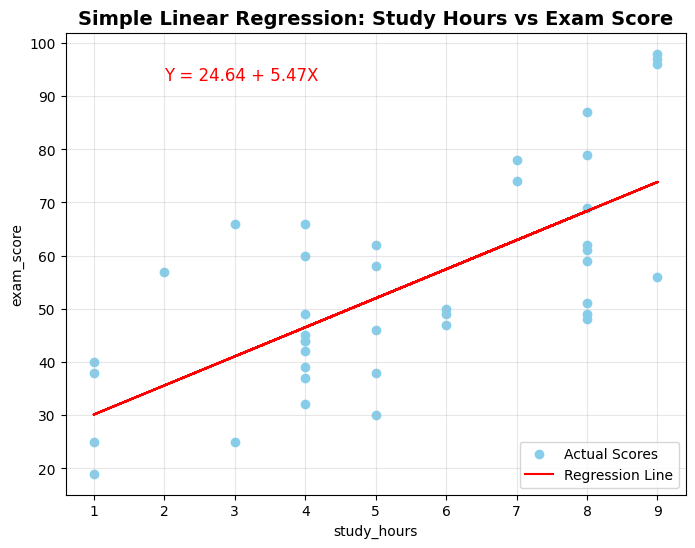

In [22]:
# lets have the regression plot using  regression line and scatter plot
plt.figure(figsize=(8,6))
plt.scatter(data['study_hours'], data['exam_score'], color='skyblue', label='Actual Scores')
plt.plot(data['study_hours'], model.predict(X), color='red', label='Regression Line')

# Annotate
plt.title('Simple Linear Regression: Study Hours vs Exam Score', fontsize=14, weight='bold')
plt.xlabel('study_hours')
plt.ylabel('exam_score')
plt.text(2, max(data['exam_score'])-5, f'Y = {model.params[0]:.2f} + {model.params[1]:.2f}X', color='red', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()
